In [4]:
from satellite_analysis.catalogreaders import consistentcatalogreader as consistent

#first read the rockstar data where the distances will be calculated from

consistent_dir = '/Users/user1/documents/GEN3/rockstarcomoving001/VELA07/hlists'

consistent.consistent_catalog_reader(consistent_dir, remove_subhalos='False')

Consistent File Indices: ['100', '110', '120', '130', '140', '150', '160', '170', '180', '190', '200', '210', '220', '230', '240', '250', '260', '270', '280', '290', '300', '310', '320', '330', '340', '350', '360', '370', '380', '390', '400', '410', '420', '430', '440', '450', '460', '470', '480', '490', '500', '510', '520', '530', '540']

Using Indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]

Number of Halos found for snapshot 0 : 148
Number of Halos found for snapshot 1 : 214
Number of Halos found for snapshot 2 : 285
Number of Halos found for snapshot 3 : 345
Number of Halos found for snapshot 4 : 398
Number of Halos found for snapshot 5 : 444
Number of Halos found for snapshot 6 : 477
Number of Halos found for snapshot 7 : 481
Number of Halos found for snapshot 8 : 505
Number of Halos found for snapshot 9 : 527
Number of Halos found for snapshot 10 : 5

Generating for scale factor: 100
Generating for scale factor: 110


/Users/user1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/user1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:89: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Generating for scale factor: 120
Generating for scale factor: 130
Generating for scale factor: 140
Generating for scale factor: 150
Generating for scale factor: 160
Generating for scale factor: 170
Generating for scale factor: 180
Generating for scale factor: 190
Generating for scale factor: 200
Generating for scale factor: 210
Generating for scale factor: 220
Generating for scale factor: 230
Generating for scale factor: 240
Generating for scale factor: 250
Generating for scale factor: 260
Generating for scale factor: 270
Generating for scale factor: 280
Generating for scale factor: 290
Generating for scale factor: 300
Generating for scale factor: 310
Generating for scale factor: 320
Generating for scale factor: 330
Generating for scale factor: 340
Generating for scale factor: 350
Generating for scale factor: 360
Generating for scale factor: 370
Generating for scale factor: 380
Generating for scale factor: 390
Generating for scale factor: 400
Generating for scale factor: 410
Generating

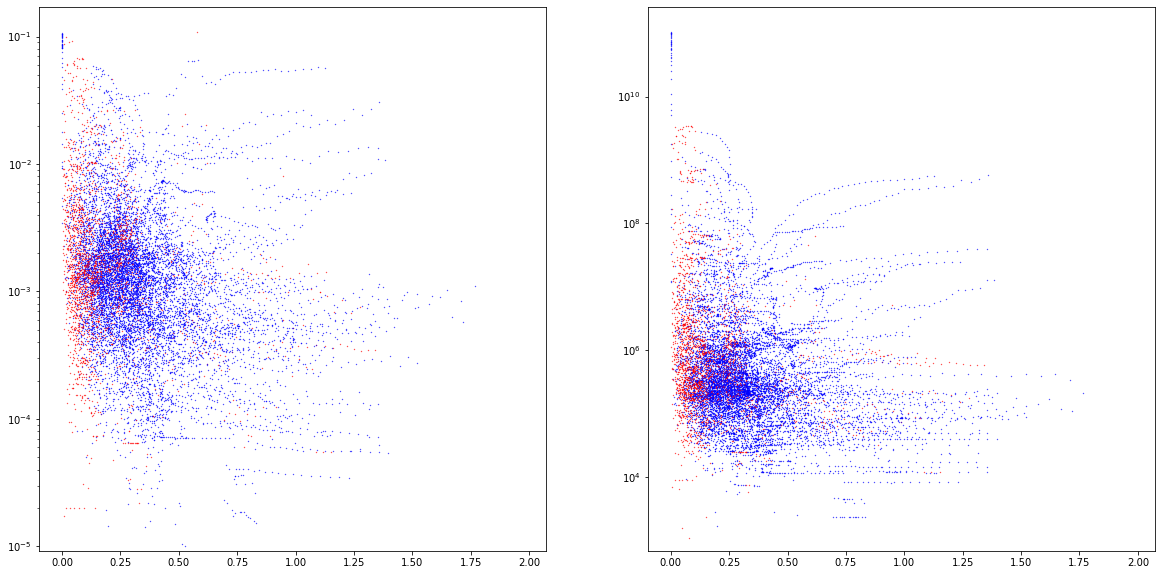

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from satellite_analysis.massrelations import stellarmass_relations

#now find the stellar mass

stellarmass_dir = '/Users/user1/documents/GEN3/rockstarcomoving001/stellarmassrelation/VELA07'
out_dir = '/Users/user1/documents/GEN3/rockstarcomoving001/stellarmassrelation'

hosts_all_snaps = []
satellites_all_snaps = []

for index in consistent.snapshot_index:
    print('Generating for scale factor: {}'.format(consistent.consistent_file_index[index]))
    
    try: 
        readfile = open('%s/halomass%s.ascii' % (stellarmass_dir, consistent.consistent_file_index[index]))
        lines = readfile.readlines()
        halomass_lines = []
        for line in lines:
            halomass_lines.append(line.split())
        del halomass_lines[0]
        
        #now that the file is loaded, get the location of the largest halo to use
        
        largest_halo = consistent.halo_data_sorted[index][0]
        largest_x = float(largest_halo[17])
        largest_y = float(largest_halo[18])
        largest_z = float(largest_halo[19])
        
        #also generate the float of the scale factor for conversion of comoving Kpc/h to proper Kpc
        #conversion factor: comoving Kpc/h * scale_factor / .7
        
        scale_factor = float(consistent.consistent_file_index[index])/1000
        
        stellarmass_host = []
        halomass_host = []
        ratio_host = []
        distance_host = []
        
        stellarmass_satellite = []
        halomass_satellite = []
        ratio_satellite = []
        distance_satellite = []
        
        for data_lists in halomass_lines:
            
            #generate a tuple for each line, consisting of (halo_id, stellarmass, halomass)
            #also split the data based on satellite or central object
            
            #for now, am using .1 rvir
            #will need to add gas to halomass later
            halo_id = float(data_lists[0])
            pid = float(data_lists[1])
            stellarmass = float(data_lists[4])
            halomass_central = float(data_lists[4]) + float(data_lists[2])
            halomass_satellites = float(data_lists[4]) + float(data_lists[3])
            
            #now find the distance
            for halos in consistent.halo_data_sorted[index]:
                if float(halos[1]) == halo_id:
                    difference_x = largest_x - float(halos[17])
                    difference_y = largest_y - float(halos[18])
                    difference_z = largest_z - float(halos[19])
                    distance = (difference_x**2 + difference_y**2 + difference_z**2)**(1/2)
                    
                    #now convert the distance to proper Kpc
                    distance = distance * scale_factor / .7
            if pid == -1:
                stellarmass_host.append(stellarmass)
                halomass_host.append(halomass_central)
                ratio_host.append(stellarmass/halomass_central)
                distance_host.append(distance)
            else:
                stellarmass_satellite.append(stellarmass)
                halomass_satellite.append(halomass_satellites)
                ratio_satellite.append(stellarmass/halomass_satellites)
                distance_satellite.append(distance)
        
        #now plot the relation
        plt.figure(1, figsize=(20,10))
        plt.subplot(121)
        #plt.xscale('log')
        plt.yscale('log')
        #plt.xlim(10**(7.8), 10**(14))
        plt.scatter(distance_host, ratio_host, c = 'b', s = .1)
        plt.scatter(distance_satellite, ratio_satellite, c = 'r', s = .1)
        
        plt.subplot(122)
        #plt.xscale('log')
        plt.yscale('log')
        #plt.xlim(10**(7.8), 10**(14))
        #plt.ylim(10**(-2), 10**(14))
        plt.scatter(distance_host, stellarmass_host, c = 'b', s = .1)
        plt.scatter(distance_satellite, stellarmass_satellite, c = 'r', s = .1)

        plt.savefig('{}/distanceimages/{}.png'.format(out_dir, consistent.consistent_file_index[index]))
        
        
        
    except FileNotFoundError:
        print('No file: %s/halomass%s.ascii' % (stellarmass_dir, consistent.consistent_file_index[index]))

In [16]:
print(hosts_all_snaps)

[14105.0, 14544.0, 14511.0, 14491.0, 14532.0, 22212.0, 14023.0, 13973.0, 14139.0, 15300.0, 15205.0, 21784.0, 21791.0, 14429.0, 15207.0, 15305.0, 15038.0, 15093.0, 15053.0, 15040.0, 15153.0, 15020.0, 14965.0, 9063.0, 14971.0, 22268.0, 22012.0, 21987.0, 12567.0, 11004.0, 10996.0, 11020.0, 22625.0, 19163.0, 10154.0, 14205.0, 22121.0, 8727.0, 11734.0, 11730.0, 11836.0, 11792.0, 11791.0, 11870.0, 11813.0, 8667.0, 11500.0, 11655.0, 12806.0, 11418.0, 11367.0, 11914.0, 21076.0, 12529.0, 20459.0, 21023.0, 10482.0, 10537.0, 10396.0, 10359.0, 10350.0, 10303.0, 13313.0, 13192.0, 17385.0, 17128.0, 17235.0, 18625.0, 17333.0, 17209.0, 17208.0, 18476.0, 17238.0, 17041.0, 1264.0, 8389.0, 15803.0, 13072.0, 22604.0, 20704.0, 20976.0, 9991.0, 9968.0, 9935.0, 27079.0, 27095.0, 20280.0, 20289.0, 2473.0, 19947.0, 19980.0, 23480.0, 23610.0, 23899.0, 23722.0, 23913.0, 23418.0, 23886.0, 20551.0, 20544.0, 1702.0, 1697.0, 1781.0, 12332.0, 24533.0, 29888.0, 30065.0, 30082.0, 30365.0, 30185.0, 30267.0, 7236.0, 7179

In [17]:
for halos in consistent.halo_data_sorted[0]:
    print(float(halos[1]))

1702.0
15038.0
22625.0
12567.0
17385.0
28441.0
21987.0
14105.0
5369.0
15207.0
23899.0
27079.0
23610.0
14965.0
14544.0
8727.0
12806.0
22121.0
26507.0
29021.0
31168.0
19980.0
12529.0
14491.0
5336.0
15300.0
29018.0
13973.0
30445.0
29888.0
3338.0
20459.0
28710.0
31166.0
23480.0
14511.0
22268.0
11004.0
3699.0
15020.0
26358.0
9063.0
22212.0
31453.0
21076.0
21784.0
10396.0
14429.0
30082.0
11914.0
23400.0
5647.0
30507.0
11655.0
10482.0
7236.0
11500.0
10537.0
15093.0
11020.0
11367.0
24533.0
30065.0
10359.0
20551.0
23886.0
12332.0
19947.0
28743.0
1264.0
8667.0
11870.0
10154.0
11813.0
20704.0
20544.0
17128.0
11730.0
1697.0
15305.0
14532.0
8389.0
23386.0
9991.0
23722.0
13192.0
24690.0
14205.0
12705.0
20280.0
10303.0
19341.0
15205.0
11734.0
13072.0
14139.0
18476.0
10996.0
30459.0
19163.0
4031.0
15153.0
20976.0
22604.0
24669.0
15053.0
4421.0
23418.0
30365.0
2473.0
11792.0
15040.0
24128.0
7179.0
17238.0
10350.0
11836.0
26394.0
11418.0
29107.0
21023.0
18625.0
11791.0
30185.0
17041.0
21791.0
29946.0
24